In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('rating.csv')
df

,Объект,KKal,Price,proteins,fats,carbohydrates,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова
0,Устрицы,72.0,85.0,9.0,2.0,4.4,4.0,NaN,NaN,NaN,9,5.0,NaN,NaN,NaN,NaN,3.0,9
1,Арахиc соленый,640.0,69.0,25.0,52.0,17.0,2.0,6.0,4.0,8.0,7,4.0,3.0,3.0,NaN,4.0,6.0,3
2,Молоко 2.5%,42.0,5.9,3.4,2.5,5.0,5.0,1.0,5.0,5.0,4,3.0,8.0,4.0,2.0,3.0,5.0,5
3,Макароны,371.0,34.0,3.6,0.4,20.0,7.0,7.0,2.0,3.0,2,8.0,4.0,6.0,3.0,5.0,NaN,6
4,Овсяное молоко 3.2%,250.0,8.0,1.0,3.2,6.5,NaN,2.0,7.0,2.0,6,7.0,5.0,5.0,7.0,NaN,7.0,7
5,Шоколад,545.0,100.0,5.0,33.0,56.5,3.0,4.0,1.0,9.0,5,NaN,1.0,1.0,6.0,6.0,1.0,2
6,"Сырок ""РОСТАГРОЭКСПОРТ"" творожный глазированны...",360.7,35.6,7.7,19.1,39.5,NaN,3.0,3.0,NaN,1,2.0,6.0,2.0,1.0,1.0,2.0,8
7,Кефир 3.2%,57.0,5.9,3.0,3.2,4.0,6.0,5.0,8.0,4.0,8,1.0,7.0,7.0,4.0,7.0,NaN,1
8,Гречневая крупа,334.0,4.0,12.0,2.0,67.0,1.0,8.0,6.0,1.0,3,6.0,2.0,8.0,5.0,2.0,4.0,4


### Простые рейтинги
основаны на одном из признаков и правиле tbtb


In [85]:
df['kl'] = [np.where(df.KKal.values.argsort()==i)[0][0]+1 for i in range(9)]
df['P'] = [np.where(df.Price.values.argsort()==i)[0][0]+1 for i in range(9)]
df['prot'] = [np.where(df.proteins.values.argsort()==i)[0][0]+1 for i in range(9)]
df['f'] = [np.where(df.fats.values.argsort()==i)[0][0]+1 for i in range(9)]
df['c'] = [np.where(df.carbohydrates.values.argsort()==i)[0][0]+1 for i in range(9)]
df.iloc[:,6:]

,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова,kl,P,prot,f,c
0,4.0,NaN,NaN,NaN,9,5.0,NaN,NaN,NaN,NaN,3.0,9,3,8,7,2,2
1,2.0,6.0,4.0,8.0,7,4.0,3.0,3.0,NaN,4.0,6.0,3,9,7,9,9,5
2,5.0,1.0,5.0,5.0,4,3.0,8.0,4.0,2.0,3.0,5.0,5,1,2,3,4,3
3,7.0,7.0,2.0,3.0,2,8.0,4.0,6.0,3.0,5.0,NaN,6,7,5,4,1,6
4,NaN,2.0,7.0,2.0,6,7.0,5.0,5.0,7.0,NaN,7.0,7,4,4,1,5,4
5,3.0,4.0,1.0,9.0,5,NaN,1.0,1.0,6.0,6.0,1.0,2,8,9,5,8,8
6,NaN,3.0,3.0,NaN,1,2.0,6.0,2.0,1.0,1.0,2.0,8,6,6,6,7,7
7,6.0,5.0,8.0,4.0,8,1.0,7.0,7.0,4.0,7.0,NaN,1,2,3,2,6,1
8,1.0,8.0,6.0,1.0,3,6.0,2.0,8.0,5.0,2.0,4.0,4,5,1,8,3,9


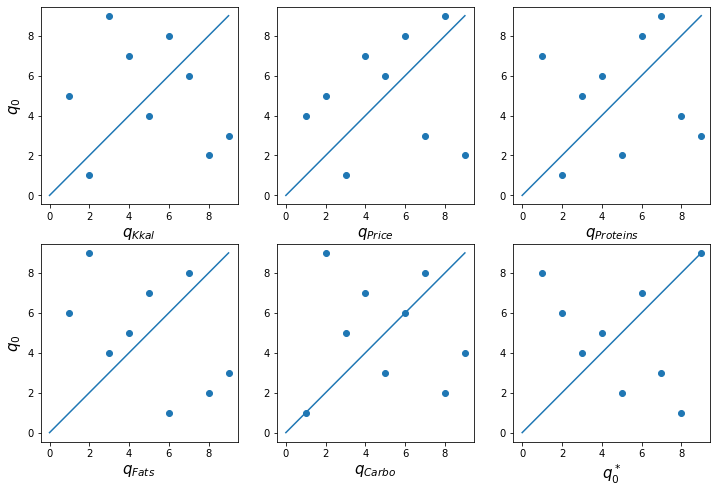

In [86]:
# не нужно
fig,ax = plt.subplots(2,3,figsize=(12,8))
param = [['kl','P','prot'],['f','c','Панченко']]
labels = [[r'$q_{Kkal}$',r'$q_{Price}$',r'$q_{Proteins}$'],[r'$q_{Fats}$',r'$q_{Carbo}$',r'$q^*_{0}$']]
for i in range(2):
    for j in range(3):
        ax[i,j].scatter(df[param[i][j]],df['Алсаханова'])
        ax[i,j].plot([0,9],[0,9])
        ax[i,j].set_xlabel(labels[i][j],size=15)
    ax[i,0].set_ylabel(r'$q_{0}$',size=15)

In [87]:
weights = pd.read_csv('weights.csv')
# матрица оценки весов 
W = weights.values.astype(float)

In [88]:
# Матрица с признаками объектов и оценками экспертов
A = df.iloc[:,6:].values

### Запонение пропусков
Используестся метод ближайших соседей (округленное среднее по 2 ближайшим соседям)

In [89]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
A_f = np.round(imputer.fit_transform(A[:,:-5].T).T)
A = np.concatenate((A[:,-5:], A_f), axis=1)

In [90]:
imputer = KNNImputer(n_neighbors=2)
W = np.round(imputer.fit_transform(W.T).T)

In [91]:
# нужно ли?
a_j_opt = 9 # так как tbtb
A_n = 1 - (A-a_j_opt)/8

Text(0.5, 0, 'mean')

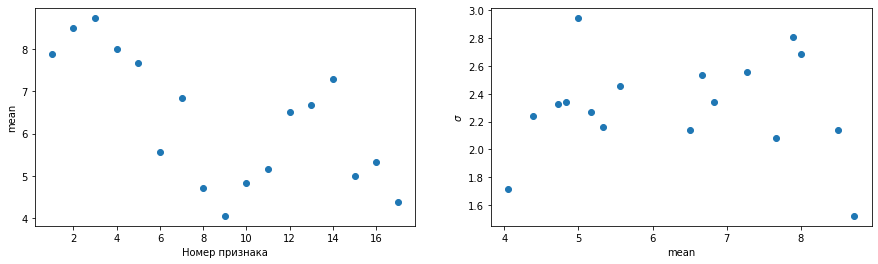

In [92]:
std_w = W.std(axis=1)
mean_w = W.mean(axis=1)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].scatter(np.arange(1,18), mean_w,label='mean')
ax[0].set_xlabel(r'Номер признака')
ax[0].set_ylabel(r'mean')
ax[1].scatter(mean_w, std_w,label='std')
ax[1].set_ylabel(r'$\sigma$')
ax[1].set_xlabel(r'mean')

Text(0.5, 0, 'mean')

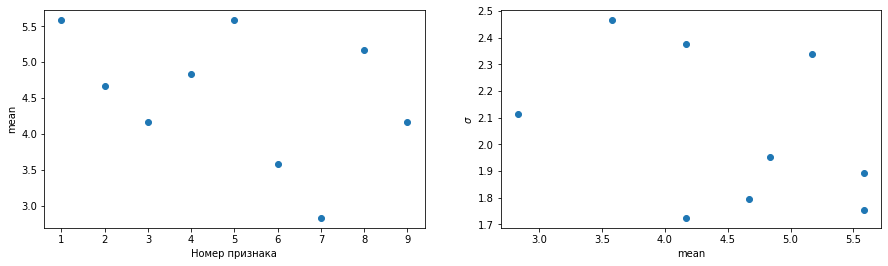

In [93]:
std_q = A[:,5:].std(axis=1)
mean_q = A[:,5:].mean(axis=1)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].scatter(np.arange(1,10), mean_q,label='mean')
ax[0].set_xlabel(r'Номер признака')
ax[0].set_ylabel(r'mean')
ax[1].scatter(mean_q, std_q,label='std')
ax[1].set_ylabel(r'$\sigma$')
ax[1].set_xlabel(r'mean')

### Линейное согласование

Функция линейного согласования, основанная на формулах:
$$ q_\alpha = \alpha q_0 + (1 − \alpha) A w_0 $$ 
$$ w_\alpha = (1 − \alpha) w_0 + \alpha A^+q_0 $$
Где $\alpha \in [0,1]$ - параметр доверия экспертным оценкам объектов, либо весов. При $\alpha = 0$ мы игнорируем экспертные оценки объектов, при $\alpha = 1$ мы игнорируем экспертные оценки весов.

In [94]:
def lin_agreement(A,q0,w0,alpha):
    A_inv = np.linalg.pinv(A)
    q_a = alpha*q0 + (1 - alpha)*A@w0 
    #q_a = np.array([np.where(q_a.argsort()==i)[0][0]+1 for i in range(9)])
    w_a = (1 - alpha)*w0 + alpha*A_inv@q0
    return q_a, w_a

#### Подбор $\alpha$
$$Q_\alpha = \frac{1}{n} \| w_\alpha - w_0 \|^2_2 + \frac{1}{m} \| q_\alpha - q_0 \|^2_2$$
$$\alpha^* = arg \min_{\alpha} \bigl\{ Q_\alpha \bigl\}$$

In [95]:
q_mean = np.array([np.where(mean_q.argsort()==i)[0][0]+1 for i in range(9)])
e,d = [],[]
for alpha in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    q_a,w_a = lin_agreement(A_n,q_mean,mean_w/np.sum(mean_w),alpha)
    e.append(sum((q_mean-q_a)**2)/q_a.shape[0])
    d.append(sum((mean_w/np.sum(mean_w)-w_a)**2)/w_a.shape[0])

In [96]:
e,d = np.array(e),np.array(d)
alpha = ((e-d).argmin()+1)/10
q_a,w_a = lin_agreement(A,q_mean,mean_w/np.sum(mean_w),alpha)
q_a

array([7.41711618, 5.16815353, 3.10248963, 5.75560166, 8.15809129,
       2.60746888, 1.6343361 , 6.46213693, 4.13443983])

In [97]:
q_ar = np.array([np.where(q_a.argsort()==i)[0][0]+1 for i in range(9)])
q_ar

array([8, 5, 3, 6, 9, 2, 1, 7, 4], dtype=int64)

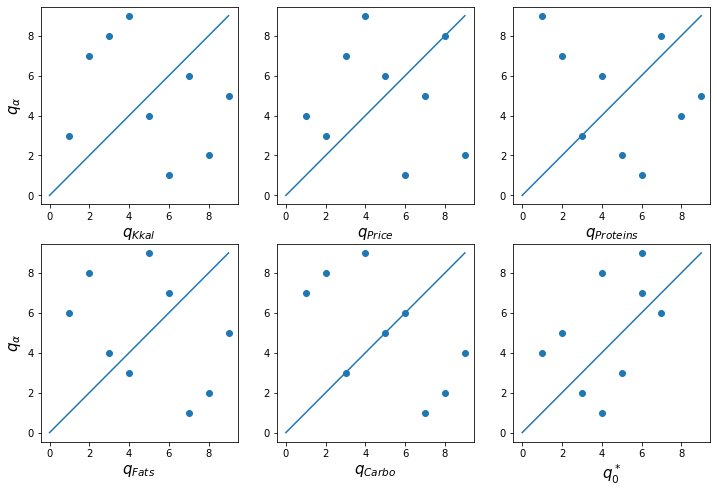

In [98]:
fig,ax = plt.subplots(2,3,figsize=(12,8))
labels = [[r'$q_{Kkal}$',r'$q_{Price}$',r'$q_{Proteins}$'],[r'$q_{Fats}$',r'$q_{Carbo}$',r'$q^*_{0}$']]
for i in range(2):
    for j in range(3):
        ax[i,j].scatter(A[:,i*3+j],q_ar)
        ax[i,j].plot([0,9],[0,9])
        ax[i,j].set_xlabel(labels[i][j],size=15)
    ax[i,0].set_ylabel(r'$q_{\alpha}$',size=15)

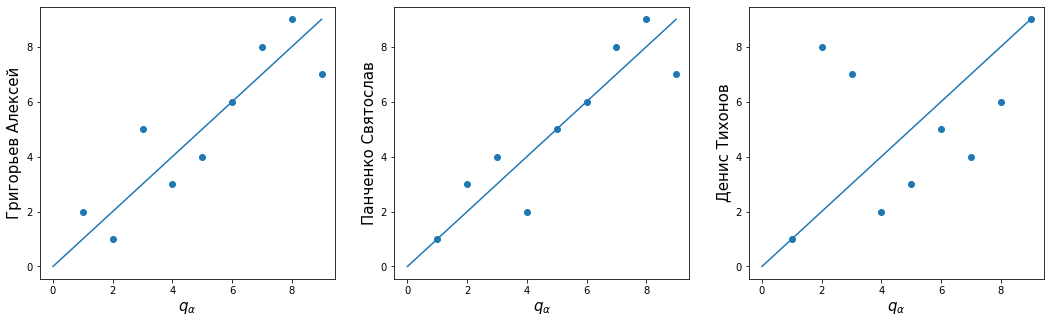

In [122]:
from matplotlib.backends.backend_pdf import PdfPages
q = [[9,4,5,6,7,1,2,8,3], [9,5,4,6,7,3,1,8,2], [6,3,7,5,9,8,1,4,2]]
names = ['Григорьев Алексей','Панченко Святослав', 'Денис Тихонов']
fig,ax = plt.subplots(1,3,figsize=(18,5))
with PdfPages('Rating1.pdf') as pdf:
    for i in range(3):
        ax[i].scatter(q_ar,q[i])
        ax[i].plot([0,9],[0,9])
        ax[i].set_ylabel(names[i],size=15)
        ax[i].set_xlabel(r'$q_{\alpha}$',size=15)
    pdf.savefig()

# Учет предпочтения экспертов
Пусть у нас есть свое предпочтение экспертов. 

In [100]:
r_exp = np.array([ 11, 3,  2,  9,  4,  5, 7,  0,  6,  10,  1,  8]) # ранжирование экспертов, выше значение - лучше эксперт 

Чтобы учесть данный рейтиг экспертов, предлагается считать взвешанное среднее, то есть оценки экспертов использовать как веса. Так как оценки весов были даны не тем же набором экспертов, что и оценки объектов, было решено добавить в матрицу оценок весов повторяющиеся столбцы. Например, для эксперта с рейтингом 5, в матрице оценок весов и матрице оценок объектов будет 5 одинаковых столбцов. Взятие среднего по таким матрицам давало бы  взвешанное среднее, если бы оценки весов были даны тем же набором экспертов, что и оценки объектов

In [101]:
A_p, W_p = A.copy(),W.copy()
for i in range(12):
    if r_exp[i] > 0:
        for j in range(r_exp[i]):
            A_p = np.concatenate((A_p,A[:,5+i:6+i]),axis=1)
            try:
                W_p = np.concatenate((W_p,weights[df.columns[6+i]].values[...,None]),axis=1)
            except KeyError:
                print('No ', df.columns[6+i])
                break

No  Христолюбов


In [102]:
imputer = KNNImputer(n_neighbors=2)
W_p = np.round(imputer.fit_transform(W_p.T).T)

Text(0.5, 0, 'mean')

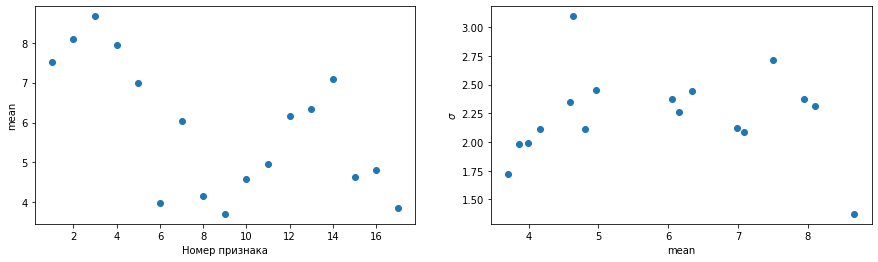

In [103]:
std_w = W_p.std(axis=1)
mean_w_p = W_p.mean(axis=1)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].scatter(np.arange(1,18), mean_w_p,label='mean')
ax[0].set_xlabel(r'Номер признака')
ax[0].set_ylabel(r'mean')
ax[1].scatter(mean_w_p, std_w,label='std')
ax[1].set_ylabel(r'$\sigma$')
ax[1].set_xlabel(r'mean')

Text(0.5, 0, 'mean')

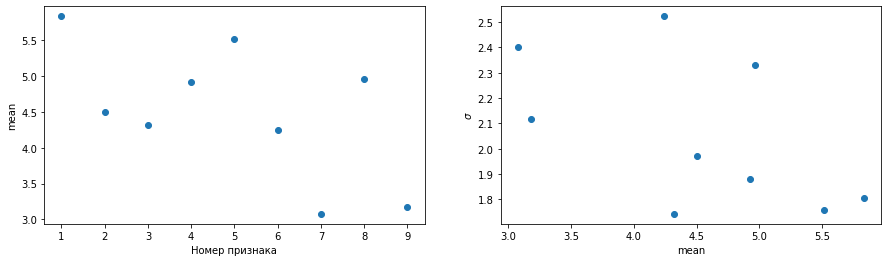

In [104]:
std_q = A_p[:,5:].std(axis=1)
mean_q = A_p[:,5:].mean(axis=1)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].scatter(np.arange(1,10), mean_q,label='mean')
ax[0].set_xlabel(r'Номер признака')
ax[0].set_ylabel(r'mean')
ax[1].scatter(mean_q, std_q,label='std')
ax[1].set_ylabel(r'$\sigma$')
ax[1].set_xlabel(r'mean')

In [105]:
q_mean = np.array([np.where(mean_q.argsort()==i)[0][0]+1 for i in range(9)])
e,d = [],[]
for alpha in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    q_a_p,w_a_p = lin_agreement(A_n,q_mean,mean_w_p/np.sum(mean_w_p),alpha)
    e.append(sum((q_mean-q_a_p)**2)/q_a.shape[0])
    d.append(sum((mean_w_p/np.sum(mean_w_p)-w_a_p)**2)/w_a_p.shape[0])

In [106]:
e,d = np.array(e),np.array(d)
alpha = ((e-d).argmin()+1)/10
q_a_p,w_a_p = lin_agreement(A,q_mean,mean_w_p/np.sum(mean_w_p),alpha)
q_a_p

array([8.22038247, 5.18574195, 3.89728879, 5.74517066, 7.3526991 ,
       3.41972888, 1.6372549 , 6.45722585, 2.5416122 ])

In [107]:
q_a_pr = np.array([np.where(q_a_p.argsort()==i)[0][0]+1 for i in range(9)])
q_a_pr

array([9, 5, 4, 6, 8, 3, 1, 7, 2], dtype=int64)

Text(0, 0.5, '$q_{0}$')

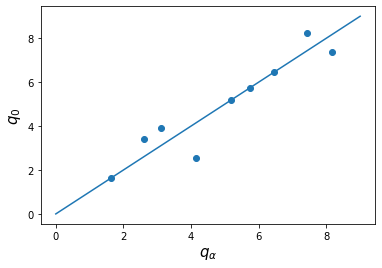

In [108]:
plt.scatter(q_a,q_a_p)
plt.plot([0,9],[0,9])
plt.xlabel(r'$q_{\alpha}$',size=15)
plt.ylabel(r'$q_{0}$',size=15)

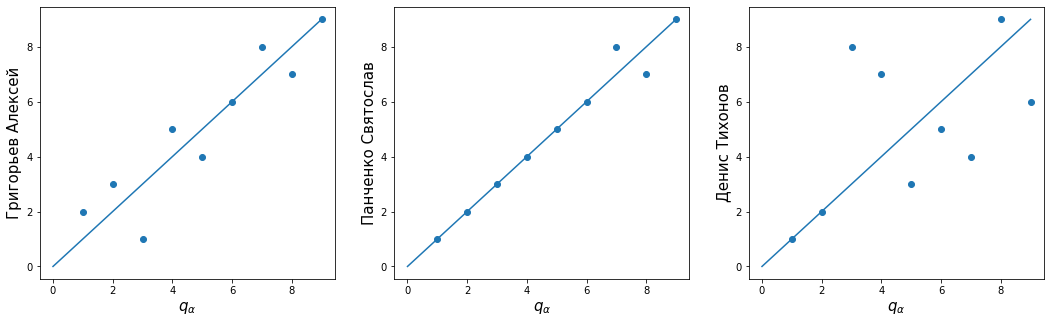

In [116]:
q = [[9,4,5,6,7,1,2,8,3], [9,5,4,6,7,3,1,8,2], [6,3,7,5,9,8,1,4,2]]
names = ['Григорьев Алексей','Панченко Святослав', 'Денис Тихонов']
fig,ax = plt.subplots(1,3,figsize=(18,5))
with PdfPages('Rating2.pdf') as pdf:
    for i in range(3):
        ax[i].scatter(q_a_pr,q[i])
        ax[i].plot([0,9],[0,9])
        ax[i].set_ylabel(names[i],size=15)
        ax[i].set_xlabel(r'$q_{\alpha}$',size=15)
    pdf.savefig()

### Сравнение результатов до и после учета ерйтинга экспертов

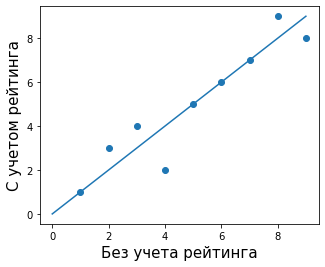

In [125]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
with PdfPages('rating_ch.pdf') as pdf:
    ax.scatter(q_ar,q_a_pr)
    ax.plot([0,9],[0,9])
    ax.set_xlabel('Без учета рейтинга',size=15)
    ax.set_ylabel(r'С учетом рейтинга',size=15)
    pdf.savefig()

Посмотрим, как изменилась величина $Q_\alpha$ для различных экспертов в зависимости от их рейтинга.

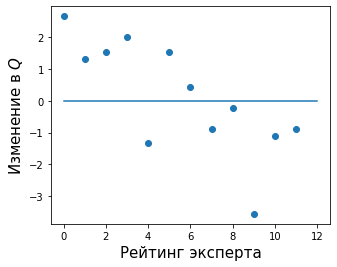

In [126]:
change= []
for i in range(12):
    Q = sum((A[:,5+i]-q_ar)**2)/q_a.shape[0] + sum((mean_w/np.sum(mean_w)-w_a)**2)/w_a.shape[0]
    Q_p = sum((A[:,5+i]-q_a_pr)**2)/q_a_p.shape[0] + sum((mean_w_p/np.sum(mean_w_p)-w_a_p)**2)/w_a_p.shape[0]
    change.append(Q_p-Q)
fig,ax = plt.subplots(1,1,figsize=(5,4))
with PdfPages('Q_ch.pdf') as pdf:
    ax.scatter(r_exp,change)
    ax.plot([0,12],[0,0])
    ax.set_xlabel('Рейтинг эксперта',size=15)
    ax.set_ylabel(r'Изменение в $Q$',size=15)
    pdf.savefig()


Видно, что почти для всех экспертов с рейтингом ниже 7 изменения положительны, то есть $q_\alpha$ отдалилось от оценки этих экспертов после учета рейтинга. Для экспертов с рейтингом не ниже 7 изменения отрицательны.  